In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8)

In [2]:
# Import data
df = pd.read_csv(r"C:\Users\candy\Documents\PORTFOLIO PROJECTS\Movie Industry Project\movies.csv")

In [3]:
#Exploring the data
df.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
#Missing values per column
for i in df.columns:
    missing = np.mean(df[i].isnull())
    print(f"{i} - {missing}")


name - 0.0
rating - 0.010041731872717789
genre - 0.0
year - 0.0
released - 0.0002608242044861763
score - 0.0003912363067292645
votes - 0.0003912363067292645
director - 0.0
writer - 0.0003912363067292645
star - 0.00013041210224308815
country - 0.0003912363067292645
budget - 0.2831246739697444
gross - 0.02464788732394366
company - 0.002217005738132499
runtime - 0.0005216484089723526


In [5]:
#Column data types
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [6]:
#Updating column data types

df = df.dropna()

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')

In [7]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0


In [8]:
#Adding the correct year

df['correctyear'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)

In [9]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctyear
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0,2020
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0,2020
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0,2020
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0,2020


In [38]:
df = df.sort_values(by = ['gross'], inplace = False, ascending = False)
#pd.set_option('display.max_rows', None)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctyear
5445,Avatar,5,0,2009,527,7.8,1100000,785,1263,1534,47,237000000,2847246203,1382,162.0,2009
7445,Avengers: Endgame,5,0,2019,137,8.4,903000,105,513,1470,47,356000000,2797501328,983,181.0,2019
3045,Titanic,5,6,1997,534,7.8,1100000,785,1263,1073,47,200000000,2201647264,1382,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,5,0,2015,529,7.8,876000,768,1806,356,47,245000000,2069521700,945,138.0,2015
7244,Avengers: Infinity War,5,0,2018,145,8.4,897000,105,513,1470,47,321000000,2048359754,983,149.0,2018


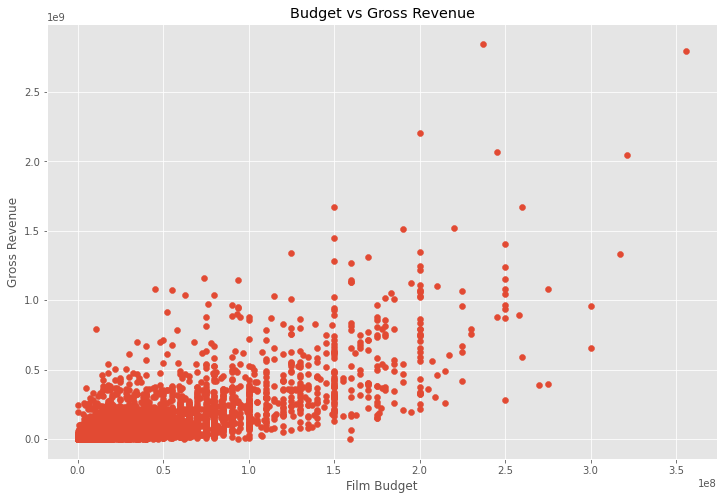

In [21]:
# Budget vs Gross revenue

plt.scatter(x = df['budget'], y = df['gross'])
plt.title('Budget vs Gross Revenue')
plt.xlabel('Film Budget')
plt.ylabel('Gross Revenue')

plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

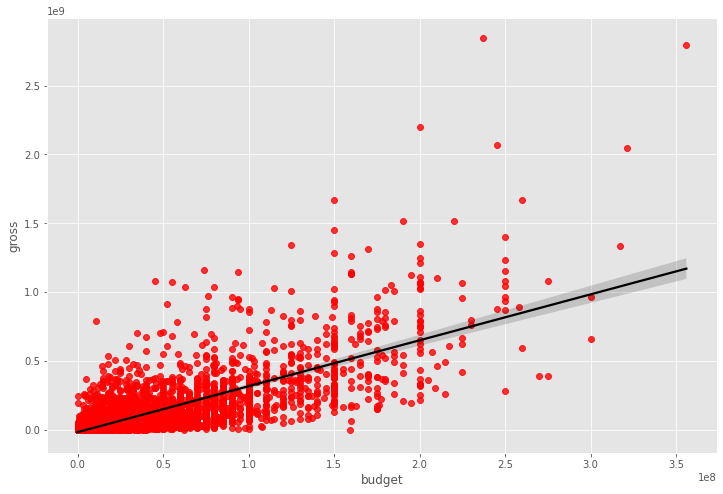

In [26]:
# Correlation between film budget and gross revenue

sns.regplot(x = 'budget', y = 'gross', data = df, scatter_kws = {'color': 'red'}, line_kws = {'color': 'black'})

In [27]:
df.corr()

,year,score,votes,budget,gross,runtime,correctyear
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077,0.998726
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068,0.061923
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303,0.203098
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695,0.320312
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796,0.268721
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000,0.075294
correctyear,0.998726,0.061923,0.203098,0.320312,0.268721,0.075294,1.000000


In [28]:
# There's a high correlation between budget and gross

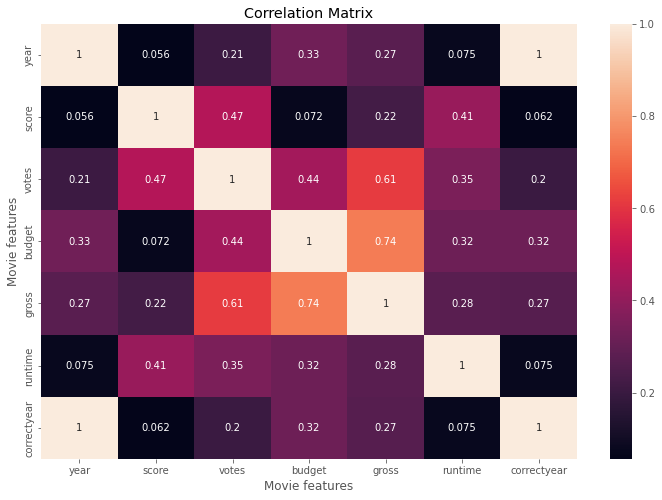

In [31]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation Matrix')
plt.xlabel('Movie features')
plt.ylabel('Movie features')

plt.show()


In [39]:
# Changing non-numerical values

df_numerical = df
for col_name in df_numerical.columns:
    if(df_numerical[col_name].dtype == 'object'):
        df_numerical[col_name] = df_numerical[col_name].astype('category')
        df_numerical[col_name] = df_numerical[col_name].cat.codes
        
df_numerical.head()       
        
        

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctyear
5445,Avatar,5,0,2009,527,7.8,1100000,785,1263,1534,47,237000000,2847246203,1382,162.0,2009
7445,Avengers: Endgame,5,0,2019,137,8.4,903000,105,513,1470,47,356000000,2797501328,983,181.0,2019
3045,Titanic,5,6,1997,534,7.8,1100000,785,1263,1073,47,200000000,2201647264,1382,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,5,0,2015,529,7.8,876000,768,1806,356,47,245000000,2069521700,945,138.0,2015
7244,Avengers: Infinity War,5,0,2018,145,8.4,897000,105,513,1470,47,321000000,2048359754,983,149.0,2018


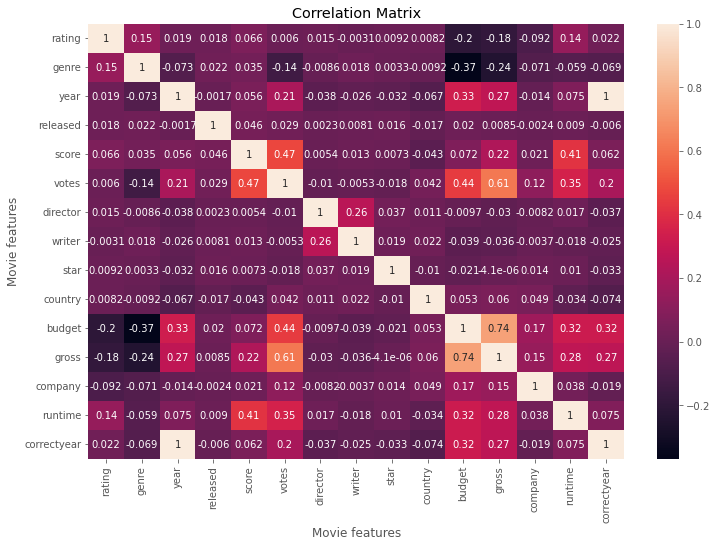

In [34]:
correlation_matrix = df_numerical.corr()
sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation Matrix')
plt.xlabel('Movie features')
plt.ylabel('Movie features')

plt.show()

In [35]:
correlation_matrix = df_numerical.corr()
corr_pairs = correlation_matrix.unstack()
corr_pairs

rating       rating         1.000000
             genre          0.147796
             year           0.019499
             released       0.018083
             score          0.065983
             votes          0.006031
             director       0.014656
             writer        -0.003149
             star           0.009196
             country        0.008230
             budget        -0.203946
             gross         -0.181906
             company       -0.092357
             runtime        0.140792
             correctyear    0.022021
genre        rating         0.147796
             genre          1.000000
             year          -0.073167
             released       0.022142
             score          0.035106
             votes         -0.135990
             director      -0.008553
             writer         0.017578
             star           0.003341
             country       -0.009164
             budget        -0.368523
             gross         -0.244101
 

In [36]:
corr_sorted = corr_pairs.sort_values()
corr_sorted

budget       genre         -0.368523
genre        budget        -0.368523
             gross         -0.244101
gross        genre         -0.244101
rating       budget        -0.203946
budget       rating        -0.203946
gross        rating        -0.181906
rating       gross         -0.181906
genre        votes         -0.135990
votes        genre         -0.135990
company      rating        -0.092357
rating       company       -0.092357
country      correctyear   -0.073569
correctyear  country       -0.073569
year         genre         -0.073167
genre        year          -0.073167
company      genre         -0.071334
genre        company       -0.071334
             correctyear   -0.069147
correctyear  genre         -0.069147
year         country       -0.066748
country      year          -0.066748
runtime      genre         -0.059237
genre        runtime       -0.059237
score        country       -0.043051
country      score         -0.043051
budget       writer        -0.039466
w

In [37]:
high_correlation = corr_sorted[(corr_sorted) > 0.5]
high_correlation

gross        votes          0.614751
votes        gross          0.614751
gross        budget         0.740247
budget       gross          0.740247
year         correctyear    0.998726
correctyear  year           0.998726
rating       rating         1.000000
writer       writer         1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
runtime      runtime        1.000000
correctyear  correctyear    1.000000
dtype: float64

In [ ]:
#Budget and votes have the highest correlation to gross revenue
#Company has low correlation to gross revenue